<a href="https://colab.research.google.com/github/pheb2014939/App_VT/blob/main/FNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
9801/9801 ━━━━━━━━━━━━━━━━━━━━ 55s 5ms/step - accuracy: 0.8896 - loss: 0.3452 - val_accuracy: 0.8905 - val_loss: 0.3343
Epoch 2/20
9801/9801 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.8904 - loss: 0.3311 - val_accuracy: 0.8905 - val_loss: 0.3277
Epoch 3/20
9801/9801 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.8898 - loss: 0.3271 - val_accuracy: 0.8905 - val_loss: 0.3228
Epoch 4/20
9801/9801 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step - accuracy: 0.8895 - loss: 0.3244 - val_accuracy: 0.8905 - val_loss: 0.3252
Epoch 5/20
9801/9801 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - accuracy: 0.8898 - loss: 0.3214 - val_accuracy: 0.8906 - val_loss: 0.3201
Epoch 6/20
9801/9801 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.8905 - loss: 0.3190 - val_accuracy: 0.8913 - val_loss: 0.3191
Epoch 7/20
9801/9801 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.8901 - loss: 0.3181 - val_accuracy: 0.8912 - val_loss: 0.3163
Epoch 8/20
9801/9801 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.8909 - loss: 0

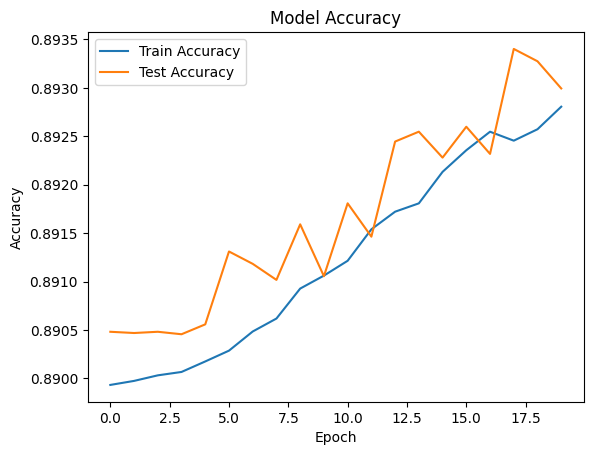

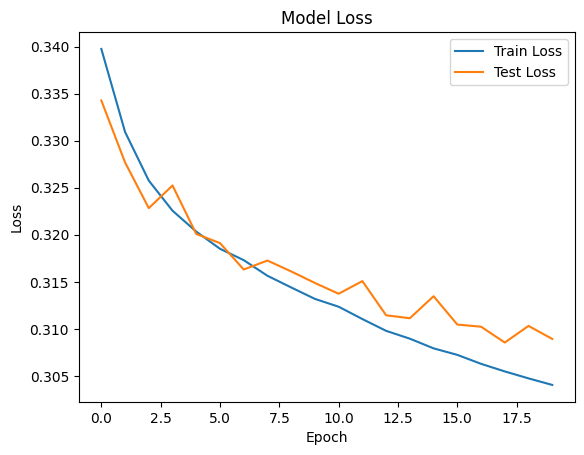

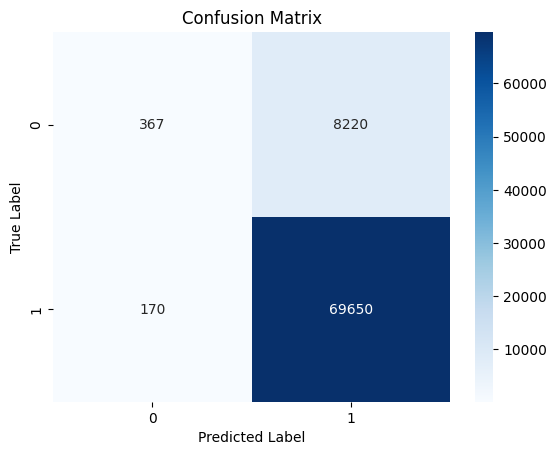

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.under_sampling import NearMiss
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Load dataset
path = '/content/drive/MyDrive/1lvtn/Android_RansomewareDataset1.csv'
df = pd.read_csv(path, index_col=0)

# Preprocessing
# Separate features and labels
X = df.drop('Label', axis=1)
y = df['Label']


# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (scale them)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the FNN model
model = Sequential()

# Input layer
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))

# Hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Output layer (Binary classification, so we use sigmoid)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)

# Calculate accuracy, precision, recall, and f1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')

# Print the confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')
print(classification_report(y_test, y_pred))

# Predicting on the test set
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)

# Evaluate with additional metrics
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')
print(classification_report(y_test, y_pred))

# Plotting training history
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
9801/9801 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.8901 - loss: 0.3443 - val_accuracy: 0.8905 - val_loss: 0.3352
Epoch 2/20
9801/9801 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.8896 - loss: 0.3336 - val_accuracy: 0.8905 - val_loss: 0.3280
Epoch 3/20
9801/9801 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.8890 - loss: 0.3301 - val_accuracy: 0.8905 - val_loss: 0.3272
Epoch 4/20
9801/9801 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.8894 - loss: 0.3261 - val_accuracy: 0.8903 - val_loss: 0.3226
Epoch 5/20
9801/9801 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.8914 - loss: 0.3198 - val_accuracy: 0.8915 - val_loss: 0.3247
Epoch 6/20
9801/9801 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.8908 - loss: 0.3187 - val_accuracy: 0.8918 - val_loss: 0.3179
Epoch 7/20
9801/9801 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.8910 - loss: 0.3176 - val_accuracy: 0.8919 - val_loss: 0.3157
Epoch 8/20
9801/9801 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.8916 - loss: 0

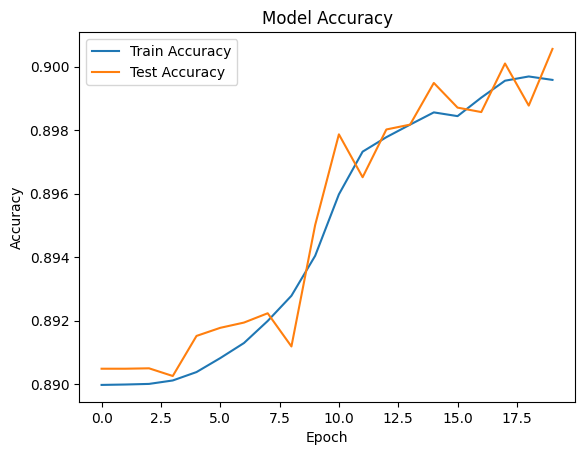

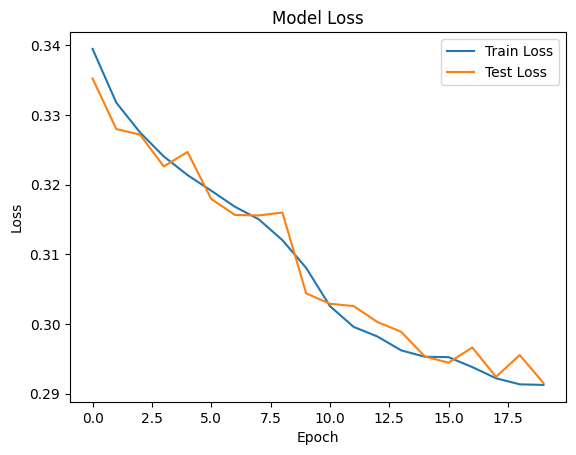

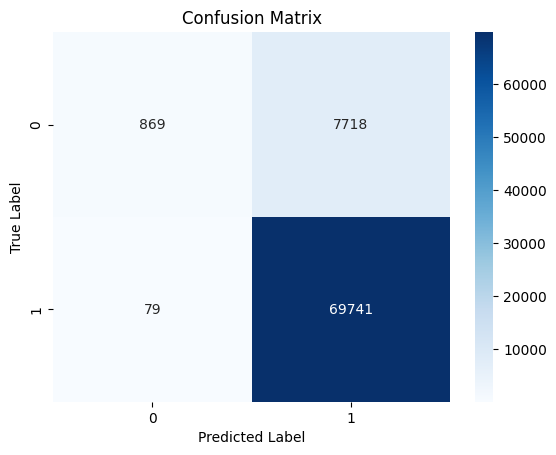

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.under_sampling import NearMiss
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Load dataset
path = '/content/drive/MyDrive/1lvtn/Android_RansomewareDataset_3.csv'
df = pd.read_csv(path, index_col=0)

# Preprocessing
# Separate features and labels
X = df.drop('Label', axis=1)
y = df['Label']


# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (scale them)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the FNN model
model = Sequential()

# Input layer
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))

# Hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Output layer (Binary classification, so we use sigmoid)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)

# Calculate accuracy, precision, recall, and f1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')

# Print the confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')
print(classification_report(y_test, y_pred))

# Predicting on the test set
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)

# Evaluate with additional metrics
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')
print(classification_report(y_test, y_pred))

# Plotting training history
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
